# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [7]:
data_dir = 'data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

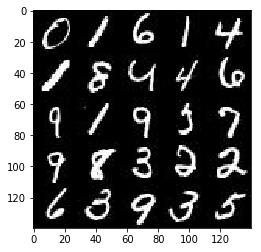

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

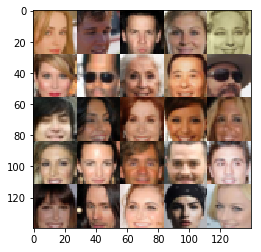

In [9]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.14.0


/home/rajeev/virtual_env/tf_1.x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [11]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images =  tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_real')
    
    tensor_of_z_data = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return real_input_images,tensor_of_z_data,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [12]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.1
        
        conv2d_1 = tf.layers.conv2d(images, 64, 5,strides= 2,padding= 'same')
        conv2d_1 = tf.maximum(alpha * conv2d_1, conv2d_1)
        
        conv2d_2 = tf.layers.conv2d(conv2d_1, 128, 5,strides= 2,padding= 'same')
        conv2d_2 = tf.layers.batch_normalization(conv2d_2, training=True)
        conv2d_2 = tf.maximum(alpha * conv2d_2, conv2d_2)
        
        conv2d_3 = tf.layers.conv2d(conv2d_2, 256, 5,strides= 2,padding= 'same')
        conv2d_3 = tf.layers.batch_normalization(conv2d_3, training=True)
        conv2d_3 = tf.maximum(alpha * conv2d_3, conv2d_3)
        
        flat = tf.reshape(conv2d_3, (-1, 4*4*256))
        logits_of_the_discriminator = tf.layers.dense(flat, 1)
        output_of_the_discriminator = tf.sigmoid(logits_of_the_discriminator)
        
    return output_of_the_discriminator, logits_of_the_discriminator



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/rajeev/virtual_env/tf_1.x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3351, in run_code
    return outflag  File "<ipython-input-11-e02ea0d4fe0a>", line 25, in <module>
    tests.test_model_inputs(model_inputs)  File "/home/rajeev/Downloads/My_Github_REPO/deep-learning/Udacity_Deep_learning/gan_mnist/Final_Project/face_generation/problem_unittests.py", line 14, in func_wrapper
    return result  File "/home/rajeev/Downloads/My_Github_REPO/deep-learning/Udacity_Deep_learning/gan_mnist/Final_Project/face_generation/problem_unittests.py", line 68, in test_model_inputs
    _check_input(learn_rate, [], 'Learning Rate')  File "/home/rajeev/Downloads/My_Github_REPO/deep-learn

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [13]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.1
    
        layer_1 = tf.layers.dense(z, 2*2*512)
        layer_1 = tf.reshape(layer_1, (-1, 2, 2, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
    
        layer_2 = tf.layers.conv2d_transpose(layer_1, 256, 5, strides= 2, padding='valid')
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
    
        layer_3 = tf.layers.conv2d_transpose(layer_2, 128, 5, strides= 2, padding='same')
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
    
        logits = tf.layers.conv2d_transpose(layer_3, out_channel_dim, 5, strides= 2, padding='same')
        output_of_the_generator = tf.tanh(logits)
    
        return output_of_the_generator


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    generator_model = generator(input_z, out_channel_dim)
    discriminator_model_real, discriminator_logits_real = discriminator(input_real)
    discriminator_model_fake, discriminator_logits_fake = discriminator(generator_model, reuse=True)
    
    discriminator_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_logits_real, labels=tf.ones_like(discriminator_model_real)))
    discriminator_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=discriminator_logits_fake, labels=tf.zeros_like(discriminator_model_fake)))
    
    generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=discriminator_logits_fake, labels=tf.ones_like(discriminator_model_fake)))
    
    discriminator_loss = discriminator_loss_real + discriminator_loss_fake

    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_var = tf.trainable_variables()
    discriminator_var = [var for var in train_var if var.name.startswith('discriminator')]
    generator_var = [var for var in train_var if var.name.startswith('generator')]
    
    discriminator_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator_var)
    
    operation = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    generator_updates = [operation for operation in operation if operation.name.startswith('generator')]
    with tf.control_dependencies(generator_updates):
        generator_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=generator_var)
        
    return discriminator_train_opt, generator_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)


Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(image_width,image_height ,image_channels, z_dim)

    discriminator_loss, generator_loss = model_loss(input_real, input_z, image_channels)

    discriminator_opt, generator_opt = model_opt(discriminator_loss, generator_loss, learn_rate, beta1)
    
    steps=0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(discriminator_opt, feed_dict={
                        input_real: batch_images, input_z: z_sample, learn_rate: learning_rate})
                _ = sess.run(generator_opt, feed_dict={
                        input_z: z_sample, learn_rate: learning_rate})
                
                if steps % 10  == 0:
                    train_loss_discriminator = discriminator_loss.eval({input_z: z_sample, input_real: batch_images})
                    train_loss_generator = generator_loss.eval({input_z: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_discriminator),
                          "Generator Loss: {:.4f}".format(train_loss_generator))
                
                if steps % 100 == 0:
                    show_generator_output(sess, batch_size, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.2635... Generator Loss: 0.1436
Epoch 1/2... Discriminator Loss: 7.1529... Generator Loss: 19.4977
Epoch 1/2... Discriminator Loss: 0.1257... Generator Loss: 3.5530
Epoch 1/2... Discriminator Loss: 2.0766... Generator Loss: 2.8493
Epoch 1/2... Discriminator Loss: 1.0876... Generator Loss: 3.9478
Epoch 1/2... Discriminator Loss: 1.8930... Generator Loss: 5.3665
Epoch 1/2... Discriminator Loss: 0.5775... Generator Loss: 3.7411
Epoch 1/2... Discriminator Loss: 1.0909... Generator Loss: 4.5823
Epoch 1/2... Discriminator Loss: 0.7572... Generator Loss: 2.4063
Epoch 1/2... Discriminator Loss: 1.1577... Generator Loss: 3.7395


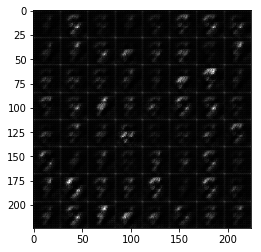

Epoch 1/2... Discriminator Loss: 1.0134... Generator Loss: 3.2258
Epoch 1/2... Discriminator Loss: 1.3725... Generator Loss: 3.4195
Epoch 1/2... Discriminator Loss: 1.1107... Generator Loss: 1.9055
Epoch 1/2... Discriminator Loss: 1.5939... Generator Loss: 2.0099
Epoch 1/2... Discriminator Loss: 1.4691... Generator Loss: 2.0452
Epoch 1/2... Discriminator Loss: 1.3647... Generator Loss: 1.5344
Epoch 1/2... Discriminator Loss: 1.6255... Generator Loss: 1.5309
Epoch 1/2... Discriminator Loss: 1.0427... Generator Loss: 1.0736
Epoch 1/2... Discriminator Loss: 1.5449... Generator Loss: 1.3514
Epoch 1/2... Discriminator Loss: 1.3449... Generator Loss: 1.4215


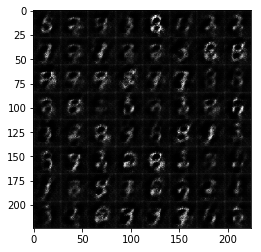

Epoch 1/2... Discriminator Loss: 1.3405... Generator Loss: 1.5180
Epoch 1/2... Discriminator Loss: 1.6014... Generator Loss: 1.8629
Epoch 1/2... Discriminator Loss: 1.3989... Generator Loss: 1.3051
Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 1.4194
Epoch 1/2... Discriminator Loss: 1.4337... Generator Loss: 1.5765
Epoch 1/2... Discriminator Loss: 1.4119... Generator Loss: 1.4821
Epoch 1/2... Discriminator Loss: 1.5003... Generator Loss: 1.5447
Epoch 1/2... Discriminator Loss: 1.2561... Generator Loss: 1.2050
Epoch 1/2... Discriminator Loss: 1.3910... Generator Loss: 1.3448
Epoch 1/2... Discriminator Loss: 1.3550... Generator Loss: 1.3633


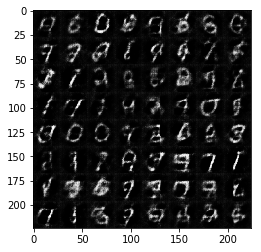

Epoch 1/2... Discriminator Loss: 1.4201... Generator Loss: 1.2006
Epoch 1/2... Discriminator Loss: 1.4060... Generator Loss: 1.2397
Epoch 1/2... Discriminator Loss: 1.4137... Generator Loss: 1.4831
Epoch 1/2... Discriminator Loss: 1.2889... Generator Loss: 1.1693
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 1.3708
Epoch 1/2... Discriminator Loss: 1.3651... Generator Loss: 1.3988
Epoch 1/2... Discriminator Loss: 1.3053... Generator Loss: 1.2320
Epoch 1/2... Discriminator Loss: 1.3760... Generator Loss: 1.2406
Epoch 1/2... Discriminator Loss: 1.4617... Generator Loss: 1.3898
Epoch 1/2... Discriminator Loss: 1.3226... Generator Loss: 1.1552


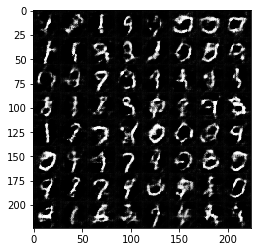

Epoch 1/2... Discriminator Loss: 1.3667... Generator Loss: 1.3251
Epoch 1/2... Discriminator Loss: 1.4585... Generator Loss: 1.3084
Epoch 1/2... Discriminator Loss: 1.4510... Generator Loss: 1.2007
Epoch 1/2... Discriminator Loss: 1.3701... Generator Loss: 1.3006
Epoch 1/2... Discriminator Loss: 1.4217... Generator Loss: 1.4196
Epoch 1/2... Discriminator Loss: 1.4079... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 1.3277... Generator Loss: 1.2771
Epoch 1/2... Discriminator Loss: 1.3061... Generator Loss: 1.2011
Epoch 1/2... Discriminator Loss: 1.3121... Generator Loss: 1.3359
Epoch 1/2... Discriminator Loss: 1.3928... Generator Loss: 1.3640


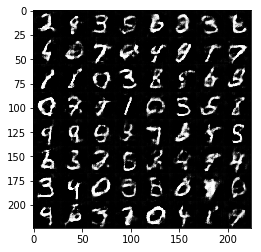

Epoch 1/2... Discriminator Loss: 1.2756... Generator Loss: 1.2545
Epoch 1/2... Discriminator Loss: 1.4932... Generator Loss: 1.4213
Epoch 1/2... Discriminator Loss: 1.2565... Generator Loss: 1.1577
Epoch 1/2... Discriminator Loss: 1.2612... Generator Loss: 1.3835
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 1.2314
Epoch 1/2... Discriminator Loss: 1.5328... Generator Loss: 1.6833
Epoch 1/2... Discriminator Loss: 1.3388... Generator Loss: 1.1448
Epoch 1/2... Discriminator Loss: 1.2871... Generator Loss: 1.3540
Epoch 1/2... Discriminator Loss: 1.3926... Generator Loss: 1.3390
Epoch 1/2... Discriminator Loss: 1.3119... Generator Loss: 1.1232


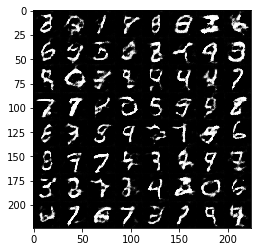

Epoch 1/2... Discriminator Loss: 1.6057... Generator Loss: 1.4248
Epoch 1/2... Discriminator Loss: 1.3835... Generator Loss: 1.3993
Epoch 1/2... Discriminator Loss: 1.2457... Generator Loss: 1.3545
Epoch 1/2... Discriminator Loss: 1.4528... Generator Loss: 1.6055
Epoch 1/2... Discriminator Loss: 1.2039... Generator Loss: 0.9996
Epoch 1/2... Discriminator Loss: 1.6065... Generator Loss: 1.5925
Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 1.0229
Epoch 1/2... Discriminator Loss: 1.3246... Generator Loss: 1.5698
Epoch 1/2... Discriminator Loss: 1.1955... Generator Loss: 1.0540
Epoch 1/2... Discriminator Loss: 1.2705... Generator Loss: 1.4199


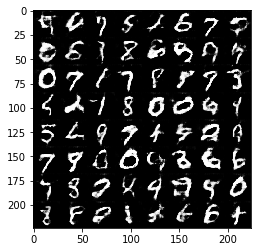

Epoch 1/2... Discriminator Loss: 1.2491... Generator Loss: 1.1850
Epoch 1/2... Discriminator Loss: 1.3243... Generator Loss: 1.4266
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 1.1720
Epoch 1/2... Discriminator Loss: 1.4000... Generator Loss: 1.7187
Epoch 1/2... Discriminator Loss: 1.2167... Generator Loss: 1.5336
Epoch 1/2... Discriminator Loss: 1.5326... Generator Loss: 1.7605
Epoch 1/2... Discriminator Loss: 1.4425... Generator Loss: 1.7988
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 1.2364
Epoch 1/2... Discriminator Loss: 1.3799... Generator Loss: 1.4945
Epoch 1/2... Discriminator Loss: 1.0690... Generator Loss: 1.2815


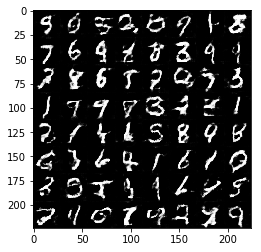

Epoch 1/2... Discriminator Loss: 1.3790... Generator Loss: 1.4931
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 1.6391


In [ ]:
batch_size = 64
z_dim = 64
learning_rate = 0.001
beta1 = 0.01


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 64
z_dim = 64
learning_rate = 0.001
beta1 = 0.001


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.